# S2 Deep Learning

## nn.Conv2d





- Kernel size, stride, padding, dilatation controls the dimensions of the output.

In [2]:
import torch
import torch.nn as nn

In [8]:
# Definimos una capa de convolución
conv1 = nn.Conv2d(
    in_channels=3,
    out_channels=2,
    kernel_size=3, # 3x3
    stride=1
)

conv2 = nn.Conv2d(
    in_channels=3,
    out_channels=2,
    kernel_size=3, # 3x3
    stride=2
)

conv3 = nn.Conv2d(
    in_channels=3,
    out_channels=2,
    kernel_size=3, # 3x3
    stride=1,
    padding=1
)

# Imagen de entrada (batch_size=1, canales=3, alto=5, ancho=5)
input_image = torch.randn(1, 3, 5, 5) # 5x5

output1 = conv1(input_image)
output2 = conv2(input_image)
output3 = conv3(input_image)

print(output1.shape)  # Salida: (1, 2, 3, 3)
print(output2.shape)  # Salida: (1, 2, 2, 2)
print(output3.shape)  # Salida: (1, 2, 5, 5)

torch.Size([1, 2, 3, 3])
torch.Size([1, 2, 2, 2])
torch.Size([1, 2, 5, 5])



<img src="images/image3.png" height="200"/>
<img src="images/image4.png" height="200"/>
<img src="images/image5.png" height="200"/>

- What about groups?

In [25]:
conv4 = nn.Conv2d(
    in_channels=8,
    out_channels=4, # four filters will be applied!
    kernel_size=3,
    groups=4 # groups filters
)

input_image = torch.randn(1, 8, 5, 5)

output_image = conv4(input_image)


print(output_image.shape)


torch.Size([1, 4, 3, 3])


<img src="images/image7.png" height="300"/>

[Tutorial](https://www.youtube.com/watch?v=n8Mey4o8gLc)

## VGG

In [36]:
import matplotlib.pyplot as plt

def visualize_tensor(tensor):
    # Extract the 3 channels from the tensor
    channels = tensor.squeeze(0)  # Remove the batch dimension (1)

    # Plot each channel as a heatmap
    fig, axes = plt.subplots(1, channels.shape[0], figsize=(12, 4))
    for i, ax in enumerate(axes):
        channel = channels[i].detach().numpy()
        im = ax.imshow(channel, cmap='viridis', interpolation='nearest')
        ax.set_title(f"Channel {i+1}")
        ax.axis("off")
        fig.colorbar(im, ax=ax, orientation='vertical')

    plt.tight_layout()
    plt.show()


torch.Size([1, 3, 32, 32])


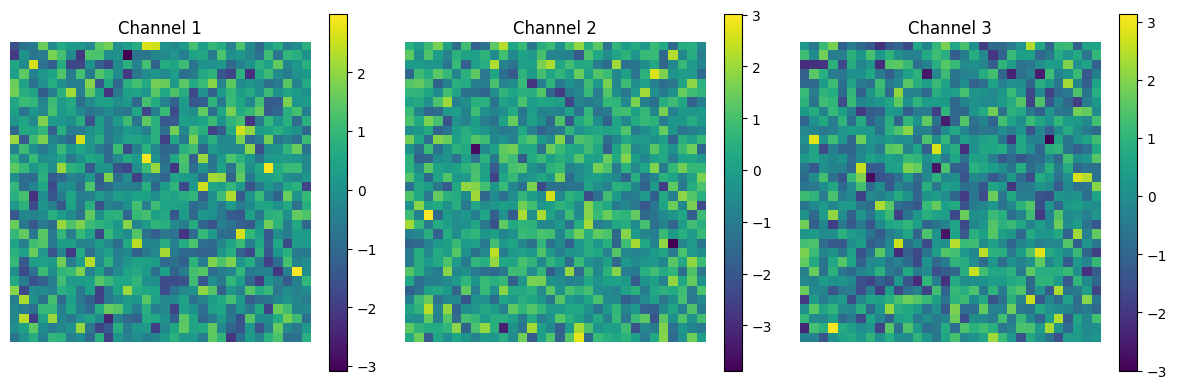

torch.Size([1, 2, 16, 16])


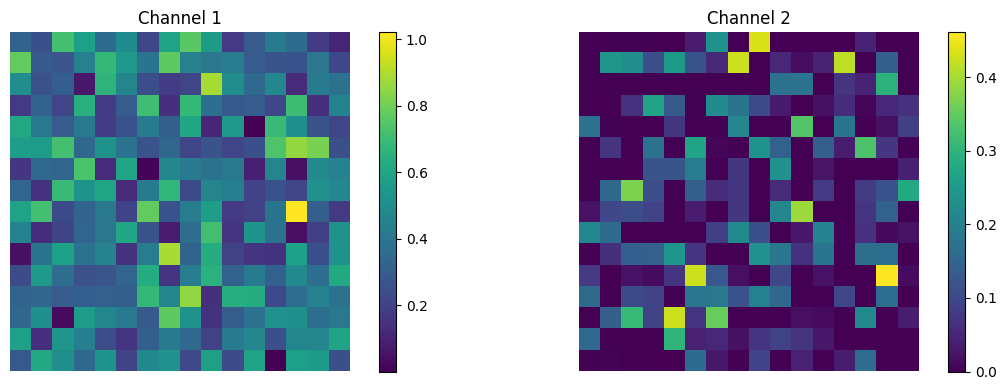

In [37]:
input = torch.randn(1, 3, 32, 32)

conv1 = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, padding=1)
conv2 = nn.Conv2d( in_channels=2, out_channels=2, kernel_size=3, padding=1)
activation = nn.ReLU(inplace=True)
pooling = nn.MaxPool2d(kernel_size=2, stride=2)

# Forward :)
output = conv1(input)
output = conv2(output)
output = activation(output)
output = pooling(output)

# Visualization :)
print(input.shape)
visualize_tensor(input)
print(output.shape)
visualize_tensor(output)

In [38]:
def conv5x5(in_chan, out_chan):
    return nn.Sequential(
        nn.Conv2d(in_chan, out_chan, kernel_size=3, padding=1),
        nn.Conv2d(out_chan, out_chan, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

def conv7x7(in_chan, out_chan):
      return nn.Sequential(
        nn.Conv2d(in_chan, out_chan, kernel_size=3, padding=1),
        nn.Conv2d(out_chan, out_chan, kernel_size=3, padding=1),
        nn.Conv2d(out_chan, out_chan, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

In [39]:
class VGG(nn.Module):
    def __init__(self,n_classes):
        super(VGG, self).__init__()
        self.ConvLayers = nn.Sequential(
            conv5x5(3, 64),
            conv5x5(64, 128),
            conv7x7(128, 256),
            conv7x7(256, 512),
            conv7x7(512 ,512)
        )
        self.FC = nn.Sequential(
            nn.Linear(4*4*512,4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096,4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096,n_classes)
        )

    def forward(self, x): # x: [n_batches, n_channels, height, width]
        x = self.ConvLayers(x)
        x = torch.flatten(x, 1)  # x: [n_batches, n_channels * height * width]
        x = self.FC(x)
        return x